In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


## EDA

#### Exploring the following topics:
#### - Age, Income Rate, WorkLifeBalance, Training, Performance, Job Satisfaction, Gender VS Attrition
#### - For employees who are terminated - examine time spend wit company, age generation

In [3]:
masterdf=pd.read_csv('AttritionRate_Datacleaning.csv')

In [4]:
masterdf.columns

Index(['Unnamed: 0', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
masterdf.corr()

,Unnamed: 0,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Unnamed: 0,1.000000,-0.010349,-0.010369,-0.051484,0.032928,0.041901,NaN,0.999906,0.017424,0.034754,...,-0.020675,-0.069654,0.062452,-0.014095,0.023907,0.010740,-0.011557,-0.008853,-0.009151,-0.009432
Age,-0.010349,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.010369,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,-0.051484,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.032928,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.041901,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.999906,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.017424,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.034754,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123


<AxesSubplot:>

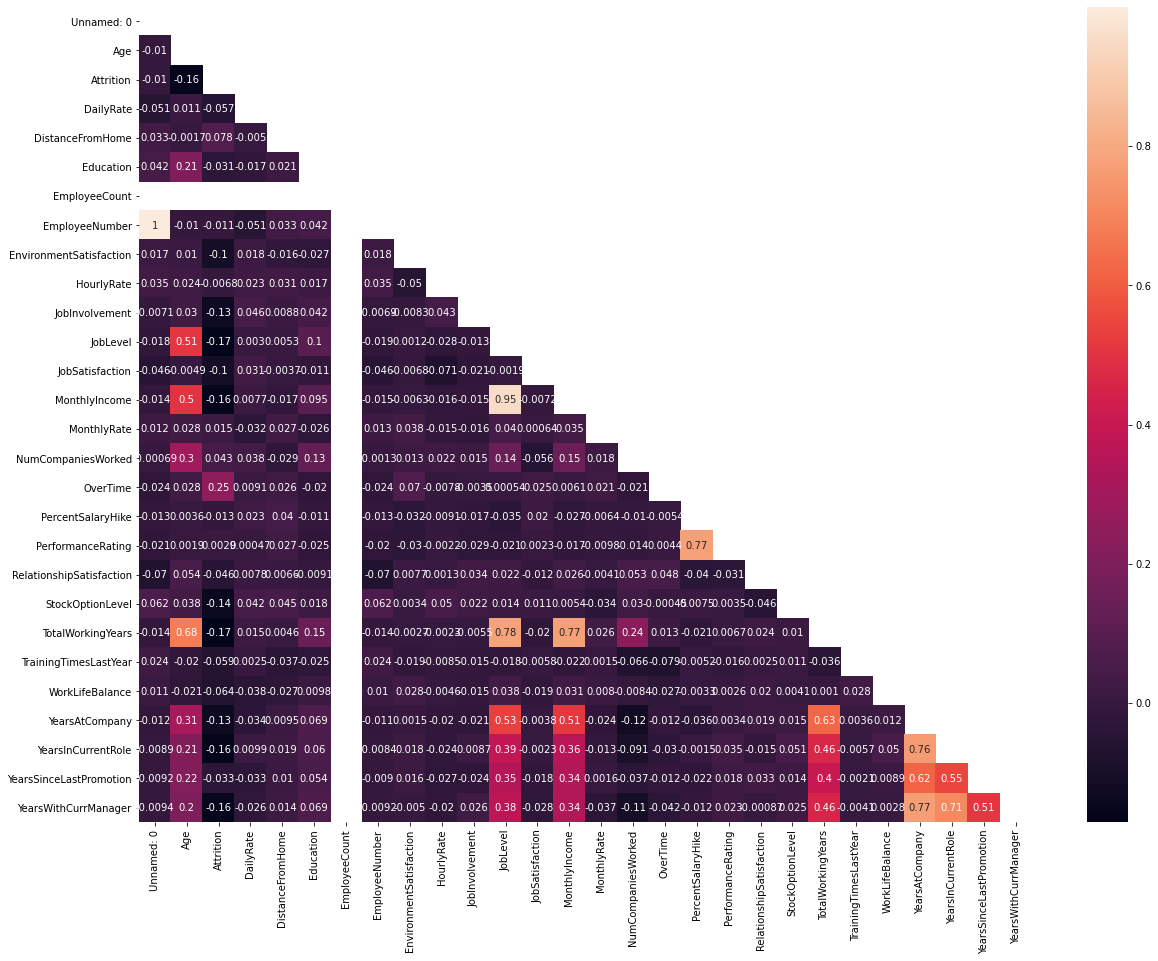

In [6]:
fig, ax = plt.subplots(figsize=(20,15)) 
mask=np.triu(np.ones_like(masterdf.corr(),dtype=bool))
sns.heatmap(masterdf.corr(),annot=True,mask=mask, annot_kws={'size':10})


Obsevation from Heatmap: strong correlation between Monthly Income and Job Level.  Weak correlation between hourly rate/monthly income and monthly rate - odd obsevation - drop hourly rate and monthly rate. 

In [7]:
#calculate annualized income
masterdf['YearlyIncome']=np.array(masterdf['MonthlyIncome'])*12

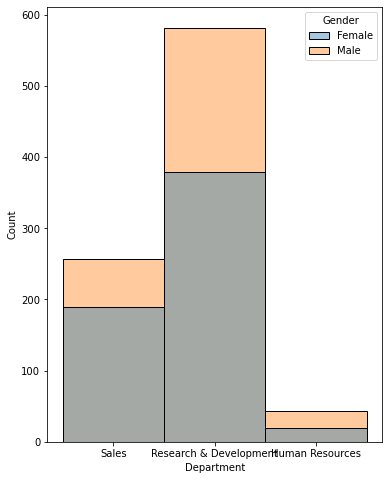

In [28]:
fig, ax = plt.subplots(figsize = (6,8))
sns.histplot(x = 'Department',data = masterdf, hue='Gender', color='grey',alpha=.4,binwidth=2)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='YearlyIncome'>

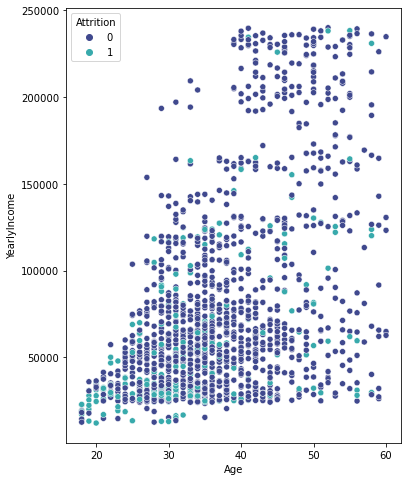

In [174]:
fig, ax = plt.subplots(figsize = (6, 8))
sns.scatterplot(data=masterdf,x='Age',y='YearlyIncome',hue='Attrition',palette="mako")

#### Observation:  Employees to earn higher income as their age is getting older 

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

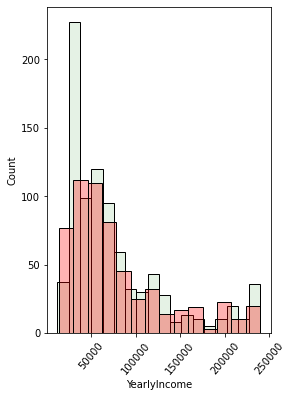

In [175]:
fig, ax = plt.subplots(figsize = (4, 6))
sns.histplot(data=masterdf.loc[masterdf['Gender']=='Male'],x='YearlyIncome',color="green",alpha=0.1)
sns.histplot(data=masterdf.loc[masterdf['Gender']=='Female'],x='YearlyIncome',color="red",alpha=0.3)

plt.xticks(rotation=50)


#### Obsevation: salary spreads evenly across different genders. 

<AxesSubplot:xlabel='Education', ylabel='YearlyIncome'>

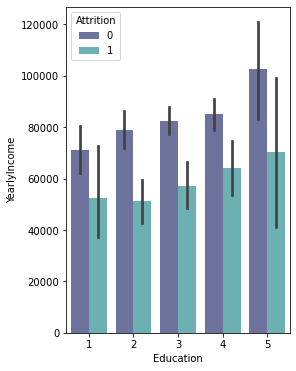

In [176]:
fig, ax = plt.subplots(figsize = (4, 6))
sns.barplot(data=masterdf,x='Education',y='YearlyIncome', hue='Attrition',palette="mako",alpha=.8)


#### Observation: Higher education provides with higher income 

### Groupby - Turnover Rate in terms of different job roles

In [177]:
role_attrition=masterdf.groupby('JobRole')['EmployeeCount','Attrition'].sum()
role_attrition=role_attrition.reset_index()
role_attrition['TurnoverRate']=(role_attrition['Attrition']/role_attrition['EmployeeCount'])*100
role_attrition=role_attrition.sort_values(by='TurnoverRate')
role_attrition

,JobRole,EmployeeCount,Attrition,TurnoverRate
5,Research Director,80,2,2.500000
3,Manager,102,5,4.901961
0,Healthcare Representative,131,9,6.870229
4,Manufacturing Director,145,10,6.896552
6,Research Scientist,292,47,16.095890
7,Sales Executive,326,57,17.484663
1,Human Resources,52,12,23.076923
2,Laboratory Technician,259,62,23.938224
8,Sales Representative,83,33,39.759036


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Research Director'),
  Text(1, 0, 'Manager'),
  Text(2, 0, 'Healthcare Representative'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Research Scientist'),
  Text(5, 0, 'Sales Executive'),
  Text(6, 0, 'Human Resources'),
  Text(7, 0, 'Laboratory Technician'),
  Text(8, 0, 'Sales Representative')])

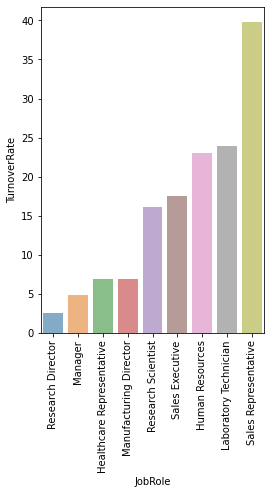

In [178]:
fig, ax = plt.subplots(figsize = (4, 6))
sns.barplot(data=role_attrition,x='JobRole',y='TurnoverRate',alpha=.6)
plt.xticks(rotation=90)

###### observation: Sales Rep has the highest turnover rate amongst all the job roles

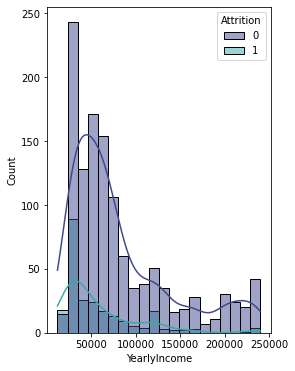

In [179]:
fig, ax = plt.subplots(figsize = (4, 6))

ax = sns.histplot(data = masterdf, x= masterdf['YearlyIncome'], hue='Attrition', palette='mako',kde=True)
plt.show();

###### Monthly income distribution - left skewed, the majority of employees are earning 2500 - 5000

### Groupby - Turnover Rate VS Job Satisfaction level. 

In [350]:
satisfaction_attrition=masterdf.groupby('JobSatisfaction')['EmployeeCount','Attrition'].sum()
satisfaction_attrition=satisfaction_attrition.reset_index()
satisfaction_attrition['TurnoverRate']=(satisfaction_attrition['Attrition']/satisfaction_attrition['EmployeeCount'])*100
satisfaction_attrition.sort_values(by="JobSatisfaction")

,JobSatisfaction,EmployeeCount,Attrition,TurnoverRate
0,1,289,66,22.837370
1,2,280,46,16.428571
2,3,442,73,16.515837
3,4,459,52,11.328976


In [18]:
departmentsatisfaction=masterdf.groupby(['JobSatisfaction','Department'])['EmployeeCount','Attrition'].sum()
departmentsatisfaction=departmentsatisfaction.reset_index()
departmentsatisfaction['turnover']=np.array(departmentsatisfaction['Attrition'])/np.array(departmentsatisfaction['EmployeeCount'])
departmentsatisfaction

,JobSatisfaction,Department,EmployeeCount,Attrition,turnover
0,1,Human Resources,11,5,0.454545
1,1,Research & Development,192,38,0.197917
2,1,Sales,86,23,0.267442
3,2,Human Resources,20,2,0.100000
4,2,Research & Development,174,24,0.137931
5,2,Sales,86,20,0.232558
6,3,Human Resources,15,3,0.200000
7,3,Research & Development,300,43,0.143333
8,3,Sales,127,27,0.212598
9,4,Human Resources,17,2,0.117647


<AxesSubplot:xlabel='JobSatisfaction', ylabel='TurnoverRate'>

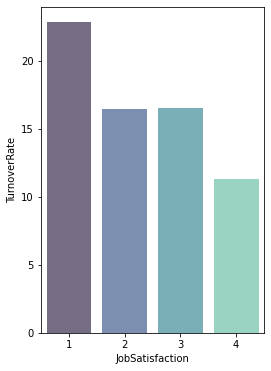

In [349]:
fig, ax = plt.subplots(figsize = (4, 6))
sns.barplot(data=satisfaction_attrition,x='JobSatisfaction',y='TurnoverRate',palette="mako",alpha=.7)

###### Employees who are more satisfied with their job are less likely to leave the company

In [22]:
worklifebalance_attrition=masterdf.groupby('WorkLifeBalance')['EmployeeCount','Attrition'].sum()
worklifebalance_attrition=worklifebalance_attrition.reset_index()
worklifebalance_attrition['TurnoverRate']=(worklifebalance_attrition['Attrition']/worklifebalance_attrition['EmployeeCount'])*100
worklifebalance_attrition.sort_values(by='TurnoverRate')

,WorkLifeBalance,EmployeeCount,Attrition,TurnoverRate
2,3,893,127,14.221725
1,2,344,58,16.860465
3,4,153,27,17.647059
0,1,80,25,31.250000


In [16]:
deparmentworklifebalance=masterdf.groupby(['WorkLifeBalance','Department'])['EmployeeCount','Attrition'].sum()
deparmentworklifebalance=deparmentworklifebalance.reset_index()
deparmentworklifebalance['turnover']=np.array(deparmentworklifebalance['Attrition'])/np.array(deparmentworklifebalance['EmployeeCount'])
deparmentworklifebalance

,WorkLifeBalance,Department,EmployeeCount,Attrition,turnover
0,1,Human Resources,4,0,0.000000
1,1,Research & Development,60,19,0.316667
2,1,Sales,16,6,0.375000
3,2,Human Resources,7,2,0.285714
4,2,Research & Development,235,32,0.136170
5,2,Sales,102,24,0.235294
6,3,Human Resources,42,9,0.214286
7,3,Research & Development,575,68,0.118261
8,3,Sales,276,50,0.181159
9,4,Human Resources,10,1,0.100000


<AxesSubplot:xlabel='WorkLifeBalance', ylabel='TurnoverRate'>

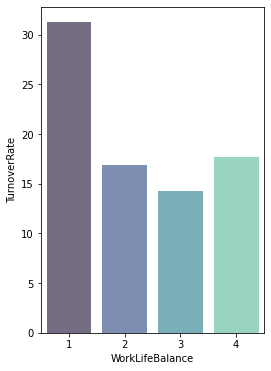

In [24]:
fig, ax = plt.subplots(figsize = (4, 6))
sns.barplot(data=worklifebalance_attrition,x='WorkLifeBalance',y='TurnoverRate',palette="mako", alpha=.7)

### Groupby - Turnover Rate VS Job Involvement level. 

In [356]:
involvement_attrition=masterdf.groupby('JobInvolvement')['EmployeeCount','Attrition'].sum()
involvement_attrition=involvement_attrition.reset_index()
involvement_attrition['TurnoverRate']=(involvement_attrition['Attrition']/involvement_attrition['EmployeeCount'])*100
involvement_attrition.sort_values(by='TurnoverRate')

,JobInvolvement,EmployeeCount,Attrition,TurnoverRate
3,4,144,13,9.027778
2,3,868,125,14.400922
1,2,375,71,18.933333
0,1,83,28,33.734940


In [17]:
deparmentinvolvement=masterdf.groupby(['JobInvolvement','Department'])['EmployeeCount','Attrition'].sum()
deparmentinvolvement=deparmentinvolvement.reset_index()
deparmentinvolvement['turnover']=np.array(deparmentinvolvement['Attrition'])/np.array(deparmentinvolvement['EmployeeCount'])
deparmentinvolvement

,JobInvolvement,Department,EmployeeCount,Attrition,turnover
0,1,Human Resources,3,1,0.333333
1,1,Research & Development,51,12,0.235294
2,1,Sales,29,15,0.517241
3,2,Human Resources,17,5,0.294118
4,2,Research & Development,248,40,0.161290
5,2,Sales,110,26,0.236364
6,3,Human Resources,36,5,0.138889
7,3,Research & Development,560,76,0.135714
8,3,Sales,272,44,0.161765
9,4,Human Resources,7,1,0.142857


<AxesSubplot:xlabel='JobInvolvement', ylabel='TurnoverRate'>

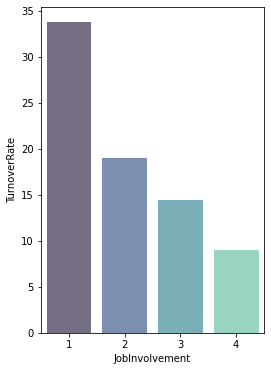

In [357]:
fig, ax = plt.subplots(figsize = (4, 6))
sns.barplot(data=involvement_attrition,x='JobInvolvement',y='TurnoverRate',palette="mako", alpha=.7)

###### Employees who are more invovled with their job are less likely to leave the company

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

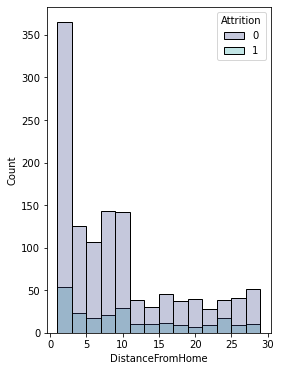

In [358]:
fig, ax = plt.subplots(figsize = (4, 6))

sns.histplot(data=masterdf,x='DistanceFromHome',hue="Attrition",palette='mako',alpha=.3)

### Feature Engineering - Classify Age by different generational groups. Source: https://www.beresfordresearch.com/age-range-by-generation/

In [364]:
#Feature_engineering : add age range for employees by generations 
masterdf['AgeRange']=masterdf['Age'].apply(lambda x: "<25|GenZ" if x<25 else "26-41|Millennials" if x<41 and x>25 else "42-57|Gen X" if x>42 and x<57 else "57+ | Boomers")
masterdf['AgeRange']

0           57+ | Boomers
1             42-57|Gen X
2       26-41|Millennials
3       26-41|Millennials
4       26-41|Millennials
              ...        
1465    26-41|Millennials
1466    26-41|Millennials
1467    26-41|Millennials
1468          42-57|Gen X
1469    26-41|Millennials
Name: AgeRange, Length: 1470, dtype: object

In [372]:
age_attrition=masterdf.groupby(['AgeRange','Gender'])['EmployeeCount','Attrition'].sum()
age_attrition=age_attrition.reset_index()
age_attrition['TurnoverRate']=(age_attrition['Attrition']/age_attrition['EmployeeCount'])*100
age_attrition=age_attrition.sort_values(by='TurnoverRate')

<AxesSubplot:xlabel='AgeRange', ylabel='TurnoverRate'>

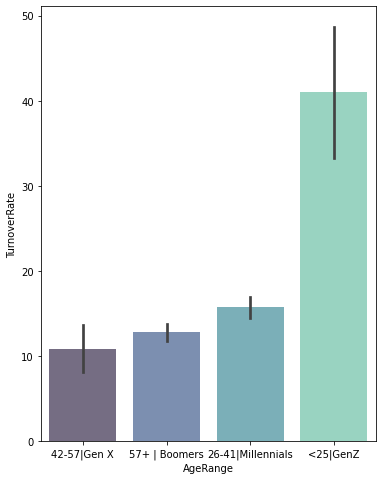

In [373]:
fig, ax = plt.subplots(figsize = (6, 8))
sns.barplot(data=age_attrition,x='AgeRange',y='TurnoverRate',palette="mako",alpha=.7)


#### Observation: For employees who are under 25 years old, Generation Z, Female employees are more likely to leave the company than male. 

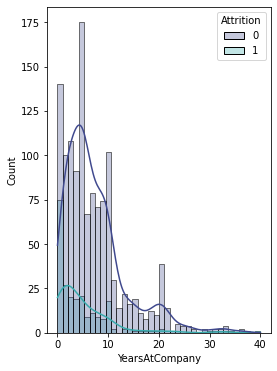

In [376]:
fig, ax = plt.subplots(figsize = (4, 6))

ax = sns.histplot(data = masterdf, x= masterdf['YearsAtCompany'],hue="Attrition",alpha=.3,kde=True,palette='mako')
plt.show();

###### Observation: Employees have the tendency of switching to a new company for the first 5 years with the company.  

In [61]:
salaryincrease_attrition=terminated.groupby('PercentSalaryHike')['EmployeeCount','YearsAtCompany'].mean()
salaryincrease_attrition=salaryincrease_attrition.reset_index()

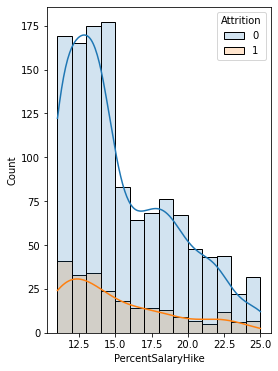

In [231]:
fig, ax = plt.subplots(figsize = (4, 6))

sns.histplot(data = masterdf, x= 'PercentSalaryHike', hue='Attrition',color='green',alpha=.2,kde=True)

plt.show();

In [63]:
stock_attrition=masterdf.groupby('StockOptionLevel')['EmployeeCount','Attrition'].sum()
stock_attrition=stock_attrition.reset_index()
stock_attrition['TurnoverRate']=(age_attrition['Attrition']/age_attrition['EmployeeCount'])*100
stock_attrition.sort_values(by='TurnoverRate')

,StockOptionLevel,EmployeeCount,Attrition,TurnoverRate
1,1,596,56,8.108108
2,2,158,12,11.764706
0,0,631,154,14.488636
3,3,85,15,48.648649


<AxesSubplot:xlabel='StockOptionLevel', ylabel='TurnoverRate'>

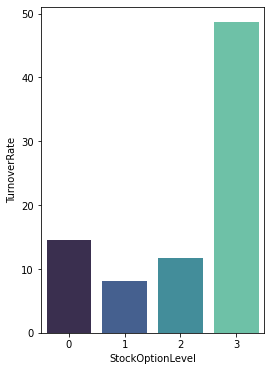

In [378]:
fig, ax = plt.subplots(figsize = (4, 6))
#pd.value_counts(masterdf[['StockOptionLevel','Attrition']]).plot.bar()
#sns.barplot(data=masterdf,x='StockOptionLevel',hue='Attrition',palette="rocket")

sns.barplot(data=stock_attrition,x='StockOptionLevel',y="TurnoverRate",palette='mako')

In [65]:
masterdf['YearlyIncome'].describe()

count      1470.000000
mean      78035.175510
std       56495.481397
min       12108.000000
25%       34932.000000
50%       59028.000000
75%      100548.000000
max      239988.000000
Name: YearlyIncome, dtype: float64

In [265]:
masterdf['IncomeDistribution']=masterdf['MonthlyIncome'].apply(lambda x:"<20%" if x < 2911 else "20%<x<50%" if x > 2911 and x < 4919 else "50%<x<75%" if x > 4919 and x< 8379 else ">75%")

In [71]:
terminated=masterdf.loc[masterdf['Attrition']==1]
terminated

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,AgeRange,IncomeDistribution
0,0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,8,0,1,6,4,0,5,71916,57+ | Boomers,50%<x<75%
2,2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,7,3,3,0,0,0,0,25080,26-41|Millennials,<20%
14,14,28,1,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,...,6,4,3,4,2,0,3,24336,26-41|Millennials,<20%
21,21,36,1,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,...,10,4,3,5,3,0,3,40884,26-41|Millennials,20%<x<50%
24,24,34,1,Travel_Rarely,699,Research & Development,6,1,Medical,1,...,8,2,3,4,2,1,3,35520,26-41|Millennials,20%<x<50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,1438,23,1,Travel_Frequently,638,Sales,9,3,Marketing,1,...,1,3,2,1,0,1,0,21480,<25|GenZ,<20%
1442,1442,29,1,Travel_Rarely,1092,Research & Development,1,4,Medical,1,...,4,3,4,2,2,2,2,57444,26-41|Millennials,20%<x<50%
1444,1444,56,1,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,...,14,4,1,10,9,9,8,28068,42-57|Gen X,<20%
1452,1452,50,1,Travel_Frequently,878,Sales,1,4,Life Sciences,1,...,12,3,3,6,3,0,1,80736,42-57|Gen X,50%<x<75%


In [72]:
dpt_term=terminated[['Department','Gender']].value_counts(normalize=True).reset_index()
dpt_term=dpt_term.rename(columns={0:"Percentage"})
dpt_term

,Department,Gender,Percentage
0,Research & Development,Male,0.379747
1,Sales,Male,0.227848
2,Research & Development,Female,0.181435
3,Sales,Female,0.160338
4,Human Resources,Male,0.025316
5,Human Resources,Female,0.025316


In [307]:
result = masterdf[["Department",'Attrition']].value_counts().reset_index().sort_values(by='Department')
result = result.rename(columns={0:"count"})
result = result.reset_index()

(array([0, 1, 2]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Sales')])

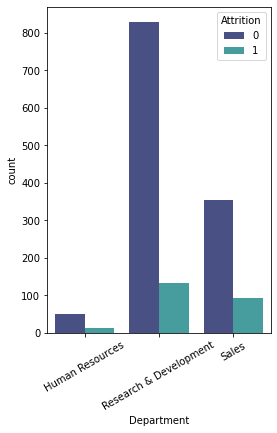

In [315]:
fig, ax = plt.subplots(figsize = (4, 6))
sns.barplot(data=result, x='Department', y='count', hue='Attrition',palette="mako")
plt.xticks(rotation=30)

In [264]:
income_term=terminated[['IncomeDistribution','Gender']].value_counts(normalize=True).reset_index()
income_term=income_term.rename(columns={0:"Percentage"})
income_term

,IncomeDistribution,Gender,Percentage
0,<20%,Male,0.270042
1,<20%,Female,0.185654
2,20%<x<50%,Male,0.151899
3,>75%,Male,0.113924
4,50%<x<75%,Male,0.097046
5,50%<x<75%,Female,0.067511
6,20%<x<50%,Female,0.067511
7,>75%,Female,0.046414


In [341]:
income=masterdf[['IncomeDistribution','Attrition']].value_counts().reset_index()
income=income.rename(columns={0:"count"}).sort_values(by='IncomeDistribution')
income=income.reindex([3,4,2,5,1,6,0,7])
income

,IncomeDistribution,Attrition,count
3,<20%,0,259
4,<20%,1,108
2,20%<x<50%,0,314
5,20%<x<50%,1,52
1,50%<x<75%,0,328
6,50%<x<75%,1,39
0,>75%,0,332
7,>75%,1,38


<AxesSubplot:xlabel='IncomeDistribution', ylabel='count'>

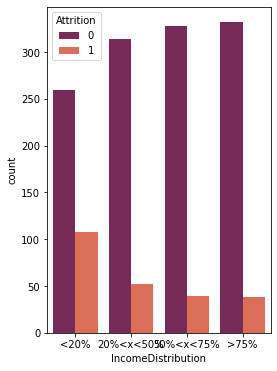

In [340]:
fig, ax = plt.subplots(figsize = (4, 6))
sns.barplot(data=income,x='IncomeDistribution',y='count',hue='Attrition',palette="rocket")

## End of EDA

In [283]:
masterdf.to_csv('AttritionRate_EDA.csv')